In [39]:
# -*- coding: utf-8 -*-
# learning
# author: Cheng Zheng

import os
import numpy as np
import pandas as pd

# Machine learning algorithms
from sklearn.linear_model import Ridge #Ridge regression

# Cross-validation
'''
GridSearchCV = Perform an optimization of the parameters. 可以保证在指定的参数范围内找到精度最高的参数
                1. search for the best parameters for model; 
                2. automatically fit a new model on the training dataset w/ the parameters that 
                    can yield the best cross-validation performance.
cross_val_score = to implement cross-validation in scikit-learn.
PS: When an integer is passed to the cv parameter of cross_val_score():
        cv=int (same as cv=StratifiedKFold(n_splits=int)) is used if the estimator is a classifier 
        and y is either binary or multiclass; In all other cases, KFold is used.
        i.e. 写int=10会自动转换为KFold(n_splits=10),不会转换为StratifiedKFold(n_splits=10)。
'''
from sklearn.model_selection import GridSearchCV, cross_val_score

path = os.getcwd()#get current path
path_up1Dir = os.path.dirname(path)#go up one directory
dataset = pd.read_excel(path_up1Dir +'/y_MVPA/y_MVPA.xlsx')#to import the preprocessed dataset into a variable

In [40]:
X = pd.DataFrame(dataset.iloc[:,4:9])
y = pd.DataFrame(dataset.iloc[:,9])
other = pd.DataFrame(dataset.iloc[:,:4])

In [43]:
# Ridge regression
'''
这里不用分X_train和y_train; 提前分割/交叉验证/自动调参的时候才需要。
What is cross-validation?
    - A statistical method of evaluating generalization performance 
        through regrouping the original dataset to multiple training sets (for training) and test sets (for evaluation).
Why cross-validation?
    - To reduce the possibility in overfitting. e.g. When doing the ridge regression, 
        the more accurate the alpha, the better the model. However, the better the model, it's easier to overfit.
        In order to solve this overfitting, we need to use K-fold cross-validation to verify.
    - To evaluate how well a given algorithm will generalize when trained on a specific dataset.
Why not leave-one-out but 10-Fold?
    - Even though leave-one-out's distribution is the closest to the original sample (just lack one sample), 
        the complexity has increased due to the number of models and our data is not deficient. 
        So, we chose 10-Fold instead to avoid the limitations of fixed datasets (reason 4 not do train_test_split), 
        since different divisions will result in different optimal models to evaluate our models.
What is 10-Fold?
    - first, split the data into ten parts of (approximately) equal size, called folds;
    - second, train a sequence of models. 
        The first one is using first fold as test set and the remaining folds (2-10) as training set, 
        and then use the model to evaluate the accuracy. 
        And similarily repeat for the other 9 model to eventually get 10 accuracy values.
'''

'''
# ridge要考虑的参数是alpha，通过GridSearchCV我们需要确定param_grid也就是这个参数有哪些值才能找到最佳模型。
# np.logspace用于创建等比数列, 开始点和结束点是10的幂, 
    i.e. logspace(-2,1,4)表示起始数字为10^-2，结尾数字为10^1即10，元素个数为4的等比数列
'''
# Set param_grid, aka the main parameters in Ridge
param_grid_Ridge = [
    {'alpha':np.logspace(-6,6,13)},
    {'alpha':np.arange(1,1001,100)}
    ]

rule = 'r2'

# GridSearchCV
ridge = GridSearchCV(estimator=Ridge(), # algorithm - Ridge regression
                     param_grid=param_grid_Ridge, # specify the parameters to search over using a dict or list of dictionaries
                     cv=10, # 10-Fold
                     scoring=rule
                    )

# Build the model
ridge.fit(X, y)

# Output the best parameter, cross-validation score, estimator, and the index of best estimator.
print("\n------------------ Ridge Regression Model")
print("Best parameter: {}".format(ridge.best_params_))
print("Best score in %s: {:.2f}".format(ridge.best_score_) %rule)
print("Average score in 10-Fold: \n", ridge.cv_results_['mean_test_score'])
print("Std score in 10-Fold: \n", ridge.cv_results_['std_test_score'])
print("Best estimator: {}".format(ridge.best_estimator_))
print("The Index of Best estimator: {}".format(ridge.best_index_))


------------------ Ridge Regression Model
Best parameter: {'alpha': 10000.0}
Best score in r2: -0.19
Average score in 10-Fold: 
 [-0.22640658 -0.22640658 -0.22640654 -0.22640619 -0.22640265 -0.22636729
 -0.22601772 -0.22288335 -0.2077885  -0.18952983 -0.18633464 -0.1870188
 -0.18713231 -0.22601772 -0.20769621 -0.20129744 -0.1977332  -0.19539004
 -0.19371482 -0.19245449 -0.19147304 -0.19068942 -0.19005175]
Std score in 10-Fold: 
 [0.31355606 0.31355606 0.313556   0.31355547 0.3135501  0.31349655
 0.31296703 0.30821732 0.28614195 0.26959263 0.27357235 0.27553529
 0.27577987 0.31296703 0.28601775 0.27809684 0.27446983 0.27249659
 0.27132709 0.27060268 0.27014611 0.26986016 0.26968739]
Best estimator: Ridge(alpha=10000.0)
The Index of Best estimator: 10


In [4]:
'''
机器学习不同于统计建模，有些定义不一样。sklearn这个包定义的比较奇怪而已。
https://zhuanlan.zhihu.com/p/369330147，score接近于1越好的是R2这个指标，其他的指标是接近于0越好。把负数去掉即可。
'''
# 10-Fold Cross-validation to check its accuracy again
score = cross_val_score(estimator=Ridge(alpha=10000.0),
                        X=X, y=y,
                        cv=10,
                        scoring=rule
                       )
print(score)

[-8.71247756e-03 -9.16088553e-01 -2.69142635e-01 -2.35679752e-01
 -3.53358220e-01 -5.48939508e-02 -5.82580884e-03  1.94478051e-03
 -7.63215421e-04 -2.08265196e-02]


In [5]:
# Use the above optimal parameters to build new model, aka training the dataset
ridge = Ridge(alpha=10000.0).fit(X, y)

In [11]:
yhat = ridge.predict(X)
print("Test set predictions:\n {}".format(yhat))

Test set predictions:
 [[-9.42624744e-03]
 [-1.01166501e-02]
 [-4.77633297e-03]
 [-1.60851842e-03]
 [-9.88559438e-03]
 [-8.73166478e-03]
 [-3.75417455e-03]
 [-1.97008283e-03]
 [-1.82871521e-03]
 [ 5.67201936e-03]
 [ 9.10954201e-03]
 [ 1.32293901e-02]
 [-6.11346929e-03]
 [ 8.29053816e-03]
 [ 1.56021208e-02]
 [-8.44619023e-03]
 [-1.05253212e-02]
 [ 2.95478157e-03]
 [-9.89549575e-03]
 [ 1.39916831e-02]
 [ 6.00606808e-03]
 [ 7.48935280e-03]
 [-9.20529241e-03]
 [-5.05951750e-03]
 [-1.15165177e-02]
 [ 1.03046275e-02]
 [-6.04966889e-03]
 [ 4.07734665e-03]
 [ 1.60075169e-03]
 [-9.08284062e-03]
 [ 1.26256826e-02]
 [-6.78223352e-03]
 [-1.18892065e-02]
 [-1.17790867e-02]
 [-6.05464810e-04]
 [ 3.95670387e-03]
 [-1.24098533e-02]
 [-4.24454807e-03]
 [-1.34184875e-02]
 [-7.85225798e-03]
 [-7.77304513e-03]
 [ 1.14351298e-02]
 [-9.21303630e-03]
 [ 3.44459861e-03]
 [ 8.03880021e-03]
 [-1.04525304e-02]
 [-1.12077224e-02]
 [ 5.44918656e-03]
 [-4.80787184e-03]
 [ 2.83814945e-02]
 [ 1.98796273e-02]
 [-2.548

In [12]:
yhat.min()

-0.013418487492610714

In [13]:
yhat.max()

0.04430650808432149

In [32]:
from sklearn.metrics import mean_squared_error as MSE
MSE(y_true=y, y_pred=yhat)

0.9986610531904418

In [36]:
#调用R2
from sklearn.metrics import r2_score
r2_score(yhat,y)

-9692.217437143943

In [37]:
r2 = ridge.score(X,y)
r2

0.0013389468095581503

In [38]:
r2_score(y_true = y, y_pred = yhat)

0.0013389468095581503

In [27]:
cross_val_score(ridge,X,y,cv=10,scoring="r2").mean()

-0.18633463516405271

In [29]:
import matplotlib.pyplot as plt
y = dataset['MVPA']
sorted(y)

[-0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.7849064233500156,
 -0.7849064233500156,
 -0.7849064233500156,
 -0.7849064233500156,
 -0.7700190891111441,
 -0.7700190891111441,
 -0.7700190891111441,
 -0.7700190891111441,
 -0.7551317548722726,
 -0.7551317548722726,
 -0.7551317548722726,
 -0.7551317548722726,
 -0.7551317548722726,
 -0.7551317548722726,
 -0.7551317548722726,
 -0.7551317548722726,
 -0.7402444206334011,
 -0.7402444206334011,
 -0.7402444206334011,
 -0.7402444206334011,
 -0.7402444206334011,
 -0.7402444206334011,
 -0.7402444206334011,
 -0.7328007535139653,
 -0.7328007535139653,
 -0.7328007535139653,
 -0.7328007535139653,
 -0.7253570863945296,
 -0.7253570863945296,
 -0.7253570863945296,
 -0.7253570863945296,
 -0.7253570863945296,
 -0.7253570863945296,
 -0.725357

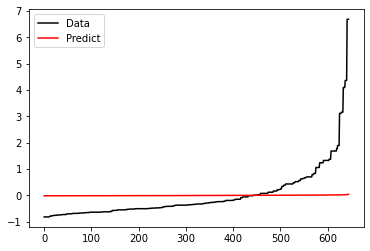

In [33]:
plt.plot(range(len(y)),sorted(y),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

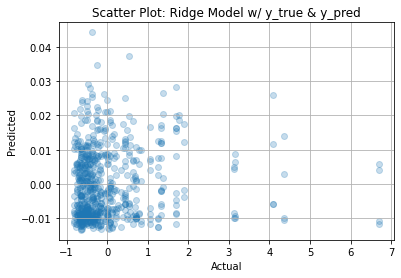

In [53]:
plt.title("Scatter Plot: Ridge Model w/ y_true & y_pred")
plt.scatter(x=y, y=yhat, alpha=0.25)
plt.xlabel('Actual') 
plt.ylabel('Predicted')
plt.grid(True)
plt.savefig(fname=path_up1Dir + "/y_MVPA/scatter_Ridge()_y_true_VS_y_pred.png")
plt.show()